In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from make_bb import *
from filt_interp import *
from mdwarf_interp import *
from lamb_eff import *
from dcr_offset import *

# code review
- PEP8 compliance - spaces around operators FIXED
- dont use list use arrays when size is predetermined FIXED
- moved lines that do not depend on ff out of the ffs loop FIXED
- your fist savefig statement returned an error cause fig is not defined FIXED
- put counter so user knows how long its gonna be FIXED
- plot the firse derived product first, leff first then r which depends on leff FIXED

0 of  1


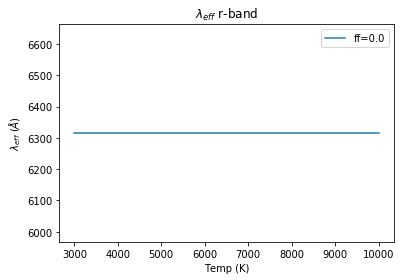

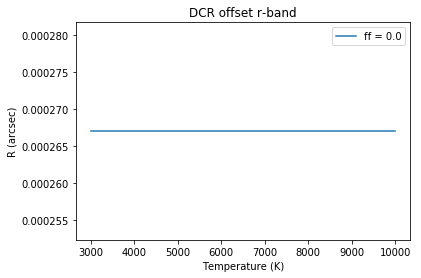

In [22]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

am = 1.4 #airmass
ffs = np.arange(0.0, 3.5, 4) #fraction of normalized BB added to mdwarf spectrum
BBwave = np.arange(0, 12000, 1) #wavelength array for make_bb
band = 'r' #LSST bandpass



tstep = 500
temps = np.arange(3000, 10000 + tstep, tstep)

for j,ff in enumerate(ffs):
    print(j, "of ", len(ffs))
    Rlist = np.zeros(len(temps))
    wefflist = np.zeros(len(temps))

    for i,t in enumerate(temps):
        w_eff = lamb_eff(band=band, temp=t, mdname='m5.all.na.k.fits', ff=ff, normT=10000)
        R = dcr_offset(w_eff, airmass = am)
        
        Rlist[i] = R
        wefflist[i] =w_eff

    ax1.plot(temps, wefflist, label='ff={}'.format(ff))
    ax1.set_xlabel('Temp (K)')
    ax1.set_ylabel(r'$\lambda_{eff}$ ($\AA$)')
    ax1.set_title(r'$\lambda_{eff}$'+' {}-band'.format(band))
    ax1.legend()
    
    ax2.plot(temps, Rlist,label='ff = {}'.format(ff))
    ax2.set_xlabel('Temperature (K)')
    ax2.set_ylabel('R (arcsec)')
    ax2.set_title('DCR offset {}-band'.format(band))
    ax2.legend()


fig1.savefig('Figures/rplot.png', dpi=300, bbox_inches='tight')
fig2.savefig('Figures/weffplot.png', dpi=300, bbox_inches='tight')

In [23]:
print(wefflist)

[6315.18541202 6315.18541202 6315.18541202 6315.18541202 6315.18541202
 6315.18541202 6315.18541202 6315.18541202 6315.18541202 6315.18541202
 6315.18541202 6315.18541202 6315.18541202 6315.18541202 6315.18541202]
